<h1>Hierarchical models</h1>

<p>Suppose we want to anlyze the quality of water in a city, so we take samples by divigng the city into neighborhoods. We may think we have two options to analyze this data:</p>

<ul>
    <li>Estimate variables for each neighborhoods as separete entities</li>
    <li>Pool the data together and estimate water quality of the city as a single big group</li>
</ul>

<p>Depends on what we would like to do booth could be reasonable options. However, we can do something between booth, actually we can do booth by construct a model that estiamtes the water quality of each neighborhood and estimates the water quality of the whole city. This type of model is know as hierarchical model or multilevel model.</p>

<p>Construct a hierachical model is just a fancy way of saying that we are putting shared priors over our priors.These priors are called hyper-priors, and their parameters hyper-parameters.</p>

In [1]:
import pandas as pd
import arviz as az
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<p>To ilustrate hierarquiqual model we are gonna to use data about heart attack of patients treated at varioues hospitals in New York City.</p>

In [10]:
data = pd.read_csv("../data/DeathHeartAttackManhattan.csv")
data.head()

,Hospital,Cases,Deaths,Death %
0,Bellevue Hospital Center,129,4,3.101
1,Harlem Hospital Center,35,1,2.857
2,Lenox Hill Hospital,228,18,7.894
3,Metropolitan Hospital Center,84,7,8.333
4,Mount Sinai Beth Israel,291,24,8.247


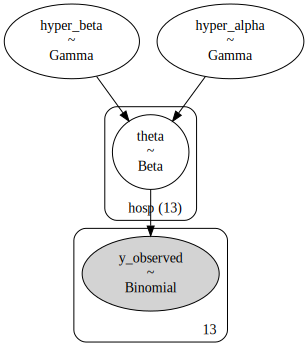

In [20]:
coords = {"hosp": data["Hospital"].values}
with pm.Model(coords = coords) as hier_mean:
    
    #Hyper priors for Normal distribution
    hyper_alpha = pm.Gamma("hyper_alpha", alpha = 4, beta = 0.5)
    hyper_beta = pm.Gamma("hyper_beta", alpha = 4, beta = 0.5)
    
    #priors
    theta = pm.Beta("theta", alpha = hyper_alpha, beta = hyper_beta, shape = len(data['Cases'].values), dims = "hosp")
    
    #likelihood
    y_observed = pm.Binomial("y_observed", n = data['Cases'].values, p = theta, observed = data['Deaths'].values)

pm.model_to_graphviz(hier_mean)

In [21]:
with hier_mean:
    
    #using MCMC trough NUTS
    samples  = pm.sample(10000, tune = 3000, cores = 4, random_seed = 42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [hyper_alpha, hyper_beta, theta]


Sampling 4 chains for 3_000 tune and 10_000 draw iterations (12_000 + 40_000 draws total) took 6 seconds.


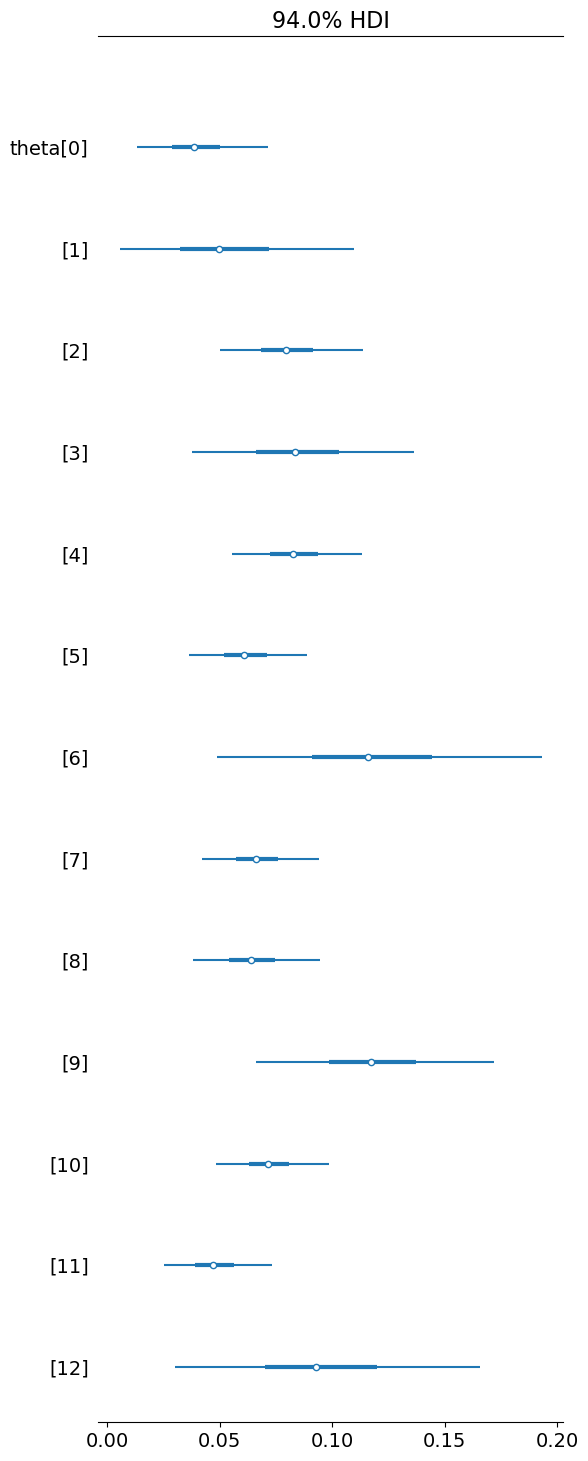

In [19]:
az.plot_forest(
    samples, 
    var_names=['theta'], 
    # ess=True, r_hat=True, 
    combined=True,
    figsize=(6,18)
);